In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Data Inspection**

In [18]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [32]:
dataset.shape

(30, 2)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# **Data Cleaning**

In [33]:
# Checking Null values
dataset.isnull().sum()*100/dataset.shape[0]
# There are no NULL values in the dataset, hence it is clean.

YearsExperience    0.0
Salary             0.0
dtype: float64

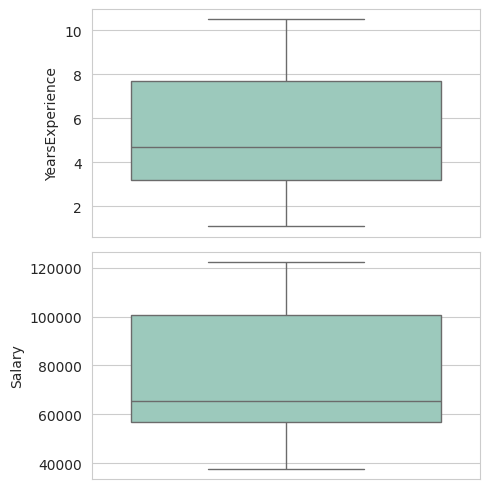

In [34]:
# Outlier Analysis
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(dataset['YearsExperience'], ax = axs[0])
plt2 = sns.boxplot(dataset['Salary'], ax = axs[1])

plt.tight_layout()

# **Exploratory Data Analysis**

Univariate Analysis

Salary (Target variable)

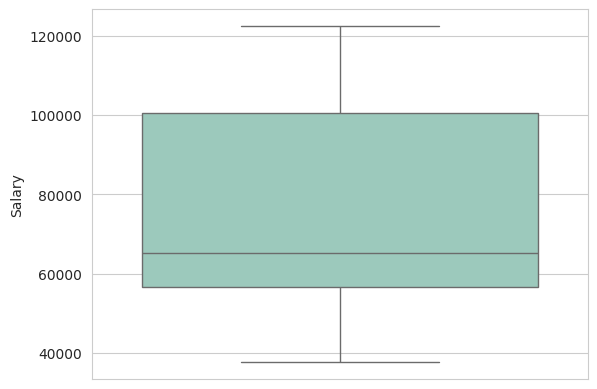

In [35]:
sns.boxplot(dataset['Salary'])
plt.show()

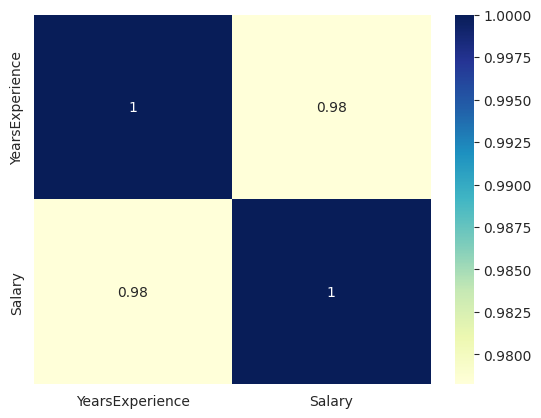

In [37]:
# Correlation between different variables.
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

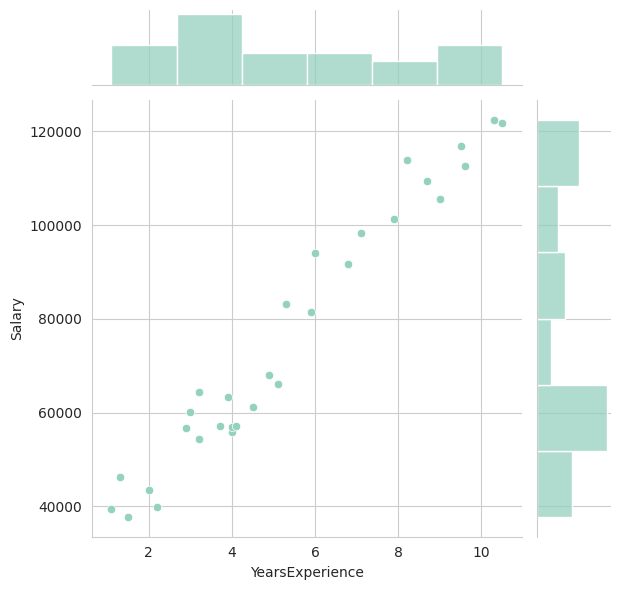

In [20]:
sns.set_palette("GnBu_d")
sns.set_style ('whitegrid')
sns.jointplot (x= 'YearsExperience', y = 'Salary', data = dataset)

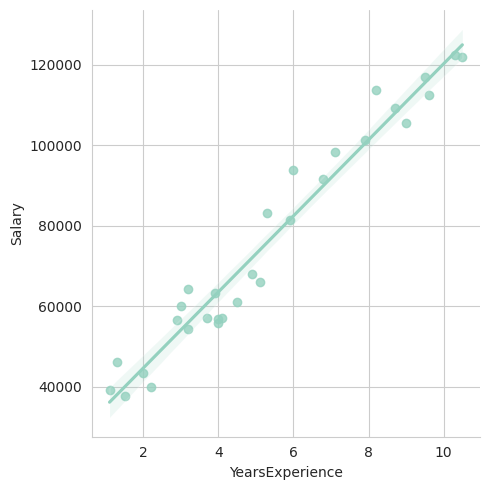

In [21]:
sns.lmplot (x= 'YearsExperience', y = 'Salary', data = dataset)

# **Training and Testing Data**

In [38]:
from sklearn.model_selection import train_test_split
y = dataset['Salary']
X = dataset[['YearsExperience']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training the Model

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [9577.17174975]


Predicting Test Data

In [26]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

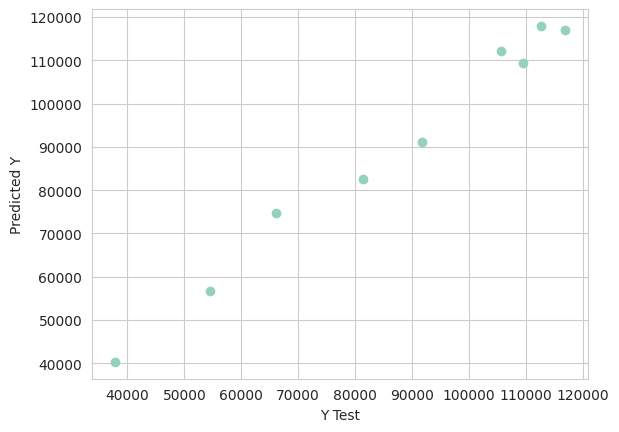

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **Evaluating the Model**

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3038.6823612518824
MSE: 17978409.49734413
RMSE: 4240.095458517901


# **Residuals**

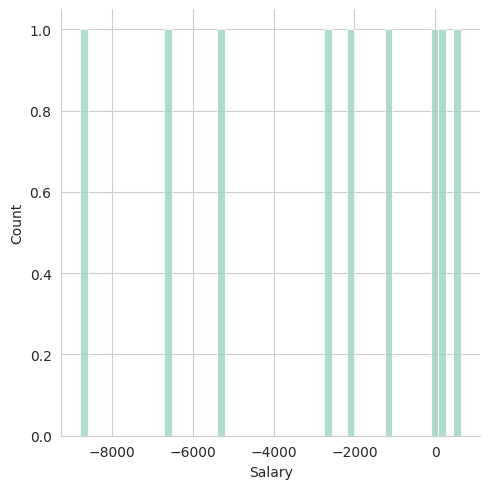

In [29]:
sns.displot((y_test-predictions),bins=50);

# **Conclusion**

In [30]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coefficient']
coeffecients

,Coefficient
YearsExperience,9577.17175
